
# Project: Investigate a Dataset - TMDb movie data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction 
In this Project i will conduct full analysis on TMDb which is dataset that contain multiple features like the Budget, Revenue, Cast and Director of a movie <br>
The value of this project is to to understand movie's features and how they could relate to each other 
### Dataset Description

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('tmdb-movies.csv')

In [3]:
df.shape

(10866, 21)

In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### This data set contains information about 10,866 movies collected from The Movie Database (TMDb), including user ratings and revenue.
<ul>
<li>
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
<li>
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
<li>
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,accounting for inflation over time.<ul>

### Questions for Analysis
<ol>
    <li>Which genres are most popular from year to year?
    <li>What are the difference between long Movie and Short Movie?
    <li>What kinds of properties are associated with movies that have high revenues?
    <li>how many movies per genres?
       <ol>

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [5]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

There are many columns that have Missing Values like
<ul>
<li>cast
<li>homepage
<li>director
<li>tagline
<ul>


In [7]:
df.budget.value_counts()

0           5696
20000000     190
15000000     183
25000000     178
10000000     176
            ... 
40000          1
28             1
68             1
3500159        1
19000          1
Name: budget, Length: 557, dtype: int64

In [8]:
df.revenue.value_counts()

0            6016
12000000       10
10000000        8
11000000        7
6000000         6
             ... 
93354918        1
76578641        1
171269535       1
215000000       1
33736689        1
Name: revenue, Length: 4702, dtype: int64

In [9]:
bud=df.budget.value_counts()[0]/10866*100
rev=df.revenue.value_counts()[0]/10866*100
"%{} of budgets are 0 and %{} of revenues are 0".format(bud,rev)

'%52.42039388919566 of budgets are 0 and %55.365359838026876 of revenues are 0'

There is big Issue in our Dataset which is half of our budgets and Revenues of movies are Zeros<br>
this issue will affect our analysis and we need to treat them to make better conlusion out of this dataset 

### Data Cleaning

In [10]:
#we dropped the columns that we don't need in our analysis 
# we will use the budget_adj and revenue_adj becuse we make sure that all movies have the same value of money and
#no external variables like inflation could change the value of money of every movie
df.drop(['imdb_id','homepage','overview','budget','revenue'],axis=1,inplace=True)

In [11]:
df.rename(columns={'budget_adj':'budget','revenue_adj':'revenue'},inplace=True)

In [12]:
df.head(2)

,id,popularity,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   original_title        10866 non-null  object 
 3   cast                  10790 non-null  object 
 4   director              10822 non-null  object 
 5   tagline               8042 non-null   object 
 6   keywords              9373 non-null   object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget                10866 non-null  float64
 15  revenue            

In [14]:
# we will drop all missing values in cast , director and genres 
df.dropna(subset=['cast','director','genres'], inplace=True)

In [15]:
# as for Taglin and keywords and production companies 
# i will replace the missing value with no_value 
df.tagline.fillna('No_Tagline',inplace=True)
df.keywords.fillna('No_Keywords',inplace=True)
df.production_companies.fillna('No_ProdComp',inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10732 non-null  int64  
 1   popularity            10732 non-null  float64
 2   original_title        10732 non-null  object 
 3   cast                  10732 non-null  object 
 4   director              10732 non-null  object 
 5   tagline               10732 non-null  object 
 6   keywords              10732 non-null  object 
 7   runtime               10732 non-null  int64  
 8   genres                10732 non-null  object 
 9   production_companies  10732 non-null  object 
 10  release_date          10732 non-null  object 
 11  vote_count            10732 non-null  int64  
 12  vote_average          10732 non-null  float64
 13  release_year          10732 non-null  int64  
 14  budget                10732 non-null  float64
 15  revenue            

Now all the missing values are gone <br>
we will fix the type of release_date to make it datetime

In [17]:
df.release_date=pd.to_datetime(df.release_date)

In [18]:
df.head(2)

,id,popularity,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [19]:
df.iloc[:,-4:-1]

,vote_average,release_year,budget
0,6.5,2015,1.379999e+08
1,7.1,2015,1.379999e+08
2,6.3,2015,1.012000e+08
3,7.5,2015,1.839999e+08
4,7.3,2015,1.747999e+08
...,...,...,...
10861,7.4,1966,0.000000e+00
10862,5.7,1966,0.000000e+00
10863,6.5,1966,0.000000e+00
10864,5.4,1966,0.000000e+00


In [20]:

df_unwanted=df.query('runtime ==0 ')
df_unwanted

,id,popularity,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
92,370687,1.876037,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,No_Tagline,sword|magic|sorcery|necromancer,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.000000e+00,0.0
334,361931,0.357654,Ronaldo,Cristiano Ronaldo,Anthony Wonke,Astonishing. Intimate. Definitive.,biography|soccer player,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",2015-11-09,80,6.5,2015,0.000000e+00,0.0
410,339342,0.097514,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,No_Tagline,tattoo|tattooing,0,Horror,No_ProdComp,2015-01-01,15,5.6,2015,0.000000e+00,0.0
445,353345,0.218528,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,No_Tagline,No_Keywords,0,Horror,WT Canada Productions,2015-10-09,52,5.0,2015,0.000000e+00,0.0
486,333653,0.176744,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,No_Tagline,woman director,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,2015-04-05,11,5.4,2015,0.000000e+00,0.0
595,341051,0.028725,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,No_Tagline,No_Keywords,0,Horror,No_ProdComp,2015-01-01,11,4.6,2015,0.000000e+00,0.0
616,325843,0.026797,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,No_Tagline,No_Keywords,0,Drama|Comedy,No_ProdComp,2015-11-10,20,6.6,2015,0.000000e+00,0.0
1289,286372,0.037459,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,No kids allowed,kidnapping|brutality|violence|teenager|discovery,0,Thriller|Horror|Mystery,Tiberius Film,2014-10-20,16,3.4,2014,2.993546e+06,0.0
1293,286256,0.036904,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,Original language PORTUGUESE,brazilian|biography|music|drama|documentary,0,Documentary|Drama|Music,Globo Filmes,2014-10-30,14,6.0,2014,0.000000e+00,0.0
1849,18247,0.120350,Spectacular!,Nolan Gerard Funk|Jesse Moss|Britt Irvin|Tammi...,Robert Iscove,No_Tagline,No_Keywords,0,Drama|Music,No_ProdComp,2009-02-16,13,5.2,2009,0.000000e+00,0.0


we will delete the movies that have 0 runtime beacuase every movie must atleast more than 0 runtime

alot of movies with 0 budget or reveniue having 0 runtime 

In [21]:
df.drop(df_unwanted.index,axis=0,inplace=True)

In [22]:
df.runtime.value_counts()

90     543
95     358
100    330
93     327
97     305
      ... 
366      1
24       1
389      1
252      1
216      1
Name: runtime, Length: 242, dtype: int64

we will make new columns that differentiate between long movie and short movie<br>
<ul>
<li>long movie is more than 40 minutes
<li> short movie is equal or less than 40 minutes

In [23]:
def typ(df):
    df['type']=None
    for i in df.index:
        if df['runtime'][i]>40:
            df['type'][i]='Long_Movie'
        else:
            df['type'][i]='Short_Movie'

In [24]:
typ(df)

C:\Users\Digital\AppData\Local\Temp/ipykernel_11392/366691945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'][i]='Long_Movie'
C:\Users\Digital\AppData\Local\Temp/ipykernel_11392/366691945.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'][i]='Short_Movie'


In [25]:
df.query('type=="Short_Movie"').head()

,id,popularity,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,type
100,326359,1.724712,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,No_Tagline,sister sister relationship|birthday|song|birth...,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2015-03-09,475,7.0,2015,0.000000,0.0,Short_Movie
159,251516,0.953046,Kung Fury,David Sandberg|Jorma Taccone|Leopold Nilsson|A...,David Sandberg,It takes a cop from the future to fight an ene...,video game|martial arts|kung fu|hacker|nazis,31,Action|Comedy|Science Fiction|Fantasy,Laser Unicorns,2015-05-28,487,7.7,2015,579617.224968,0.0,Short_Movie
216,286192,0.640151,Lava,Napua Greig|Kuana Torres Kahele,James Ford Murphy,No_Tagline,pixar animated short|animation|pixar|short,7,Animation|Comedy|Family|Fantasy|Music,Pixar Animation Studios,2015-06-19,298,7.3,2015,0.000000,0.0,Short_Movie
279,355338,0.442835,Riley's First Date?,Amy Poehler|Phyllis Smith|Bill Hader|Lewis Bla...,Josh Cooley,No_Tagline,mother daughter relationship|rock music|girl|f...,5,Animation|Family,Walt Disney Pictures|Pixar Animation Studios,2015-11-03,137,7.3,2015,0.000000,0.0,Short_Movie
343,366142,0.344994,Minions: The Competition,Pierre Coffin|Chris Renaud,Kyle Balda|Julien Soret,No_Tagline,minions,4,Animation,Illumination Entertainment,2015-11-04,16,5.9,2015,0.000000,0.0,Short_Movie


We will treat the zero values in budget and revenu columns by replacing the 0 with the median of no zero values in two ways:
<ul>
<li>In Long movies we will take the median of no zero values and replace it with zero values in long movies rows
<li>In Short movies we will take the median of no zero values and replace it with zero values in short movies rows

In [26]:
df_long=df.query('type=="Long_Movie"')
df_short=df.query('type=="Short_Movie"')

In [27]:
df_bg_long=df_long.query('budget >0')
df_rv_long=df_long.query('revenue >0')
df_bg_short=df_short.query('budget >0')
df_rv_short=df_short.query('revenue >0')

In [28]:
budget_median_long=df_bg_long.budget.median()
revenue_median_long=df_rv_long.revenue.median()
revenue_median_long,budget_median_long

(44028788.7291762, 23027276.2692864)

In [29]:
budget_median_short=df_bg_short.budget.median()
revenue_median_short=df_rv_short.revenue.median()
revenue_median_short,budget_median_short

(7495700.7196811, 357794.0506290825)

In [30]:
for i in df.index:
    if df['type'][i]=='Long_Movie':
        if df['budget'][i] == 0:
            df['budget'][i]=budget_median_long
            
        if df['revenue'][i] == 0:
            df['revenue'][i]=revenue_median_long
            
    elif df['type'][i]=='Short_Movie':
        if df['budget'][i] == 0:
            df['budget'][i]=budget_median_short
            
        if df['revenue'][i] == 0:
            df['revenue'][i]=revenue_median_short
        

C:\Users\Digital\AppData\Local\Temp/ipykernel_11392/1523612221.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget'][i]=budget_median_long
C:\Users\Digital\AppData\Local\Temp/ipykernel_11392/1523612221.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue'][i]=revenue_median_long
C:\Users\Digital\AppData\Local\Temp/ipykernel_11392/1523612221.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget'][i]=budge

In [31]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget,revenue
count,10704.000000,10704.000000,10704.000000,10704.000000,10704.000000,10704.000000,1.070400e+04,1.070400e+04
mean,64902.866592,0.653813,102.735893,220.322870,5.966022,2001.236173,2.941470e+07,7.563052e+07
std,91158.001799,1.005641,30.078104,579.455879,0.930158,12.825600,3.015316e+07,1.386468e+08
min,5.000000,0.000188,3.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10538.750000,0.211545,90.000000,17.000000,5.400000,1995.000000,2.189312e+07,4.402879e+07
50%,20235.500000,0.388068,99.000000,39.000000,6.000000,2006.000000,2.302728e+07,4.402879e+07
75%,73612.500000,0.722425,112.000000,149.000000,6.600000,2011.000000,2.302728e+07,4.402879e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [32]:
df['profit']=df.revenue-df.budget

In [33]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,profit
count,10704.000000,10704.000000,10704.000000,10704.000000,10704.000000,10704.000000,1.070400e+04,1.070400e+04,1.070400e+04
mean,64902.866592,0.653813,102.735893,220.322870,5.966022,2001.236173,2.941470e+07,7.563052e+07,4.621582e+07
std,91158.001799,1.005641,30.078104,579.455879,0.930158,12.825600,3.015316e+07,1.386468e+08,1.229254e+08
min,5.000000,0.000188,3.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00,-4.139124e+08
25%,10538.750000,0.211545,90.000000,17.000000,5.400000,1995.000000,2.189312e+07,4.402879e+07,1.252255e+07
50%,20235.500000,0.388068,99.000000,39.000000,6.000000,2006.000000,2.302728e+07,4.402879e+07,2.100151e+07
75%,73612.500000,0.722425,112.000000,149.000000,6.600000,2011.000000,2.302728e+07,4.402879e+07,3.404203e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - Which genres are most popular from year to year?

In [34]:
df_genres=df.loc[:,['popularity','genres','release_year']].copy()

In [35]:
len(df_genres.genres.unique())

2019

In [36]:
df_genres.genres.duplicated().sum()

8685

In [37]:
df_genres.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

In [38]:
# we group the dataset by year and genres to find the total popularity of every genres in every year
df_grp=df_genres.groupby(['release_year','genres']).sum()
df_grp.head()

popularity
release_year genres                                            
1960         Action|Adventure|Drama|History|Western    0.310398
             Action|Adventure|Western                  1.872132
             Action|Drama|Foreign|History|War          0.194948
             Action|Drama|History                      1.136943
             Action|Drama|History|War                  0.256779

In [39]:
year=np.array(None)
gen=np.array(None)
pop=np.array(None)

In [40]:
# we will take every year and generes so we could access to them easily
for i in df_grp.index:
    year=np.append(year,i[0])
    gen=np.append(gen,i[1])

In [41]:
for i in df_grp.index:
    pop=np.append(pop,df_grp['popularity'][i])

In [42]:
df_grp.values

array([[0.310398],
       [1.872132],
       [0.194948],
       ...,
       [0.561032],
       [0.747541],
       [9.1107  ]])

In [43]:
Data={'release_year':year,'genres':gen,'popularity':pop,}
df_new=pd.DataFrame(Data)
# beacuse the first row is null we will delete it from the dataset
df_new=df_new.iloc[1:,:]
df_new.head()

,release_year,genres,popularity
1,1960,Action|Adventure|Drama|History|Western,0.310398
2,1960,Action|Adventure|Western,1.872132
3,1960,Action|Drama|Foreign|History|War,0.194948
4,1960,Action|Drama|History,1.136943
5,1960,Action|Drama|History|War,0.256779


In [44]:
# to detemine the best generes we will organize it by year and popularity 
df_bestG=df_new.sort_values(by=['release_year','popularity'],ascending=False)
df_bestG.head()

,release_year,genres,popularity
5778,2015,Action|Adventure|Science Fiction|Thriller,61.405699
5868,2015,Drama,35.477358
5831,2015,Comedy,26.503648
5790,2015,Action|Crime|Thriller,14.304167
5836,2015,Comedy|Drama,13.332803


In [45]:
Past_year=0
year=np.array(None)
gen=np.array(None)
pop=np.array(None)

In [46]:
# we will take the first value of every year beacause it is the highest popularity
for ind in df_bestG.index:
    if df_bestG['release_year'][ind] !=Past_year:
        year=np.append(year,df_bestG['release_year'][ind])
        gen=np.append(gen,df_bestG['genres'][ind])
        pop=np.append(pop,df_bestG['popularity'][ind])
        Past_year=df_bestG['release_year'][ind]   

In [47]:
# this new Data Frame with highest popularity of genre per year
Data={'release_year':year,'genres':gen,'popularity':pop}
df_gen=pd.DataFrame(Data)
df_gen=df_gen.iloc[1:,:]
df_gen.head()

,release_year,genres,popularity
1,2015,Action|Adventure|Science Fiction|Thriller,61.405699
2,2014,Drama,45.126157
3,2013,Comedy,26.382453
4,2012,Drama,21.74544
5,2011,Comedy,24.751245


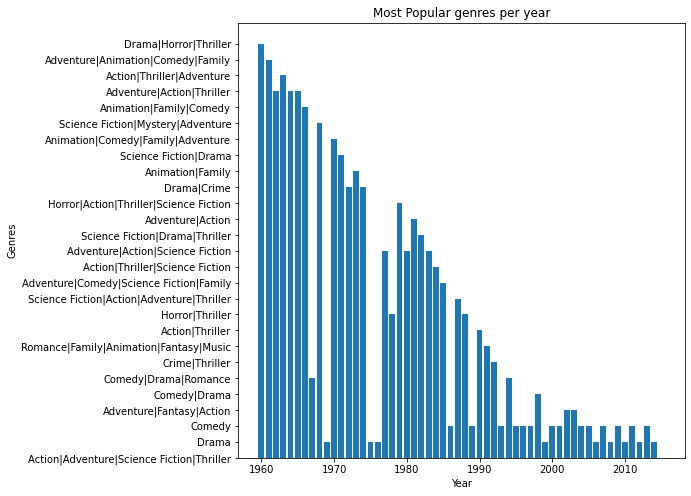

In [48]:
plt.figure(figsize=(8,8))
plt.bar(df_gen['release_year'],df_gen['genres'])
plt.xlabel('Year')
plt.ylabel('Genres')
plt.title('Most Popular genres per year');

### Research Question 2 - What are the difference between long Movie and Short Movie?

In [49]:
df.head(2)

,id,popularity,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,type,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Long_Movie,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Long_Movie,2.101614e+08


In [50]:
df_long=df.query('type== "Long_Movie"')
df_short=df.query('type== "Short_Movie"')

In [51]:
df_short.head()

,id,popularity,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,type,profit
100,326359,1.724712,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,No_Tagline,sister sister relationship|birthday|song|birth...,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2015-03-09,475,7.0,2015,357794.050629,7.495701e+06,Short_Movie,7.137907e+06
159,251516,0.953046,Kung Fury,David Sandberg|Jorma Taccone|Leopold Nilsson|A...,David Sandberg,It takes a cop from the future to fight an ene...,video game|martial arts|kung fu|hacker|nazis,31,Action|Comedy|Science Fiction|Fantasy,Laser Unicorns,2015-05-28,487,7.7,2015,579617.224968,7.495701e+06,Short_Movie,6.916083e+06
216,286192,0.640151,Lava,Napua Greig|Kuana Torres Kahele,James Ford Murphy,No_Tagline,pixar animated short|animation|pixar|short,7,Animation|Comedy|Family|Fantasy|Music,Pixar Animation Studios,2015-06-19,298,7.3,2015,357794.050629,7.495701e+06,Short_Movie,7.137907e+06
279,355338,0.442835,Riley's First Date?,Amy Poehler|Phyllis Smith|Bill Hader|Lewis Bla...,Josh Cooley,No_Tagline,mother daughter relationship|rock music|girl|f...,5,Animation|Family,Walt Disney Pictures|Pixar Animation Studios,2015-11-03,137,7.3,2015,357794.050629,7.495701e+06,Short_Movie,7.137907e+06
343,366142,0.344994,Minions: The Competition,Pierre Coffin|Chris Renaud,Kyle Balda|Julien Soret,No_Tagline,minions,4,Animation,Illumination Entertainment,2015-11-04,16,5.9,2015,357794.050629,7.495701e+06,Short_Movie,7.137907e+06


Text(0.5, 1.0, 'The Profit of Long Movies Per Year')

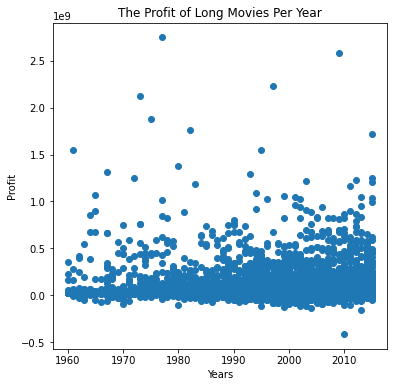

In [52]:
plt.figure(figsize=(6,6))
plt.scatter(df_long['release_year'],df_long['profit'])
plt.xlabel('Years')
plt.ylabel('Profit')
plt.title('The Profit of Long Movies Per Year')

the profit in long movie is increasing from 1960 to 2015

Text(0.5, 1.0, 'The Profit of short Movies Per Year')

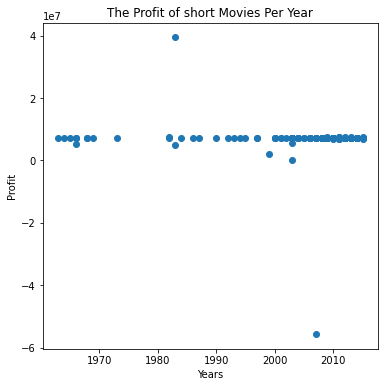

In [53]:
plt.figure(figsize=(6,6))
plt.scatter(df_short['release_year'],df_short['profit'])
plt.xlabel('Years')
plt.ylabel('Profit')
plt.title('The Profit of short Movies Per Year')

there is no increasing of profit in short movies 

In [54]:
proportion_long=len(df_long)/len(df)*100
proportion_short=len(df_short)/len(df)*100
proportion_long,proportion_short

(98.29970104633782, 1.7002989536621822)

Text(0.5, 1.0, 'proportion of Long Movie and short Movie')

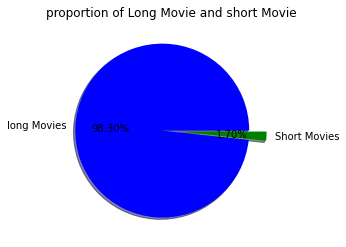

In [55]:
labels=['long Movies','Short Movies']
colors=['blue','green']
plt.pie([proportion_long,proportion_short],colors=colors,labels=labels,explode=(0.1,0.1),autopct='%1.2f%%',shadow=True);
plt.title('proportion of Long Movie and short Movie')

the numbers of Long movies has most majority of TMDb dataset

### Research Question 3 - What kinds of properties are associated with movies that have high revenues?


In [56]:
df.head(2)

,id,popularity,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,type,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Long_Movie,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Long_Movie,2.101614e+08


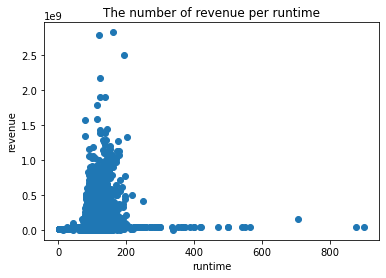

In [57]:
plt.scatter(df['runtime'],df['revenue'])
plt.xlabel('runtime')
plt.ylabel('revenue')
plt.title('The number of revenue per runtime');

To have high revenue the movie should less than 200 minutes

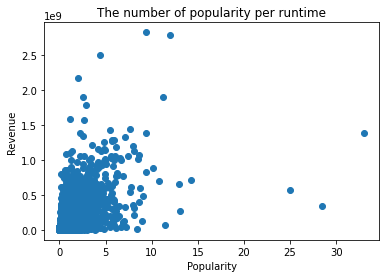

In [58]:
plt.scatter(df['popularity'],df['revenue'])
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('The number of popularity per runtime');

most of highest movies have number of popularity less than 15  

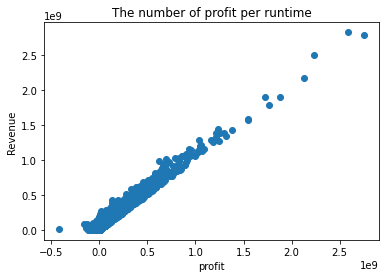

In [59]:
plt.scatter(df['profit'],df['revenue'])
plt.xlabel('profit')
plt.ylabel('Revenue')
plt.title('The number of profit per runtime');

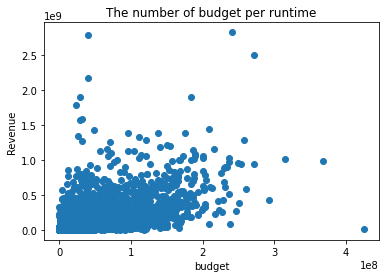

In [60]:
plt.scatter(df['budget'],df['revenue'])
plt.xlabel('budget')
plt.ylabel('Revenue')
plt.title('The number of budget per runtime');

most of highest revenues have budget less than 300,000,000 millions 

### Research Question 4 - how many movies per  genres?

In [61]:
# we creat dictionary with unique genres 
dic={}
for ind in df.index:
    for genre in df['genres'][ind].split('|'):
        dic[genre]=0
dic    

{'Action': 0,
 'Adventure': 0,
 'Science Fiction': 0,
 'Thriller': 0,
 'Fantasy': 0,
 'Crime': 0,
 'Western': 0,
 'Drama': 0,
 'Family': 0,
 'Animation': 0,
 'Comedy': 0,
 'Mystery': 0,
 'Romance': 0,
 'War': 0,
 'History': 0,
 'Music': 0,
 'Horror': 0,
 'Documentary': 0,
 'TV Movie': 0,
 'Foreign': 0}

In [62]:
# find how many movies in every genre 
for ind in df.index:
    for genre in df['genres'][ind].split('|'):
        dic[genre]+=1        

In [63]:
# convert from dic to array
gen=np.array(None)
val=np.array(None)
for key, value in dic.items():
    gen=np.append(gen,key)
    val=np.append(val,value)

In [64]:
# drop null values
val = val[~pd.isnull(val)]
val

array([2375, 1464, 1221, 2901, 907, 1353, 164, 4739, 1212, 664, 3765, 806,
       1703, 268, 330, 394, 1628, 467, 159, 183], dtype=object)

In [65]:
gen = gen[~pd.isnull(gen)]
gen

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

Text(0.5, 1.0, 'Number of movies per Genre')

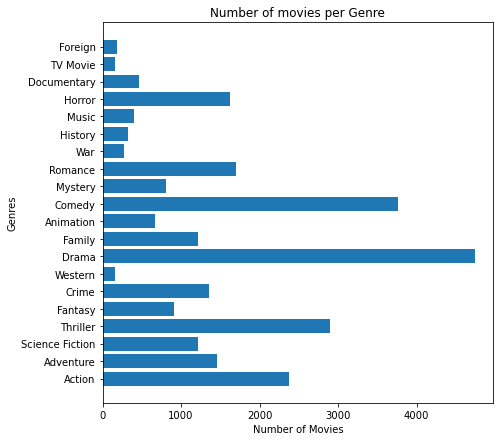

In [66]:
plt.figure(figsize=(7,7))
plt.barh(gen,val);
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.title('Number of movies per Genre')

Drama and Comedy have the most of movies

<a id='conclusions'></a>
## Conclusions

### Question 1 - Which genres are most popular from year to year?

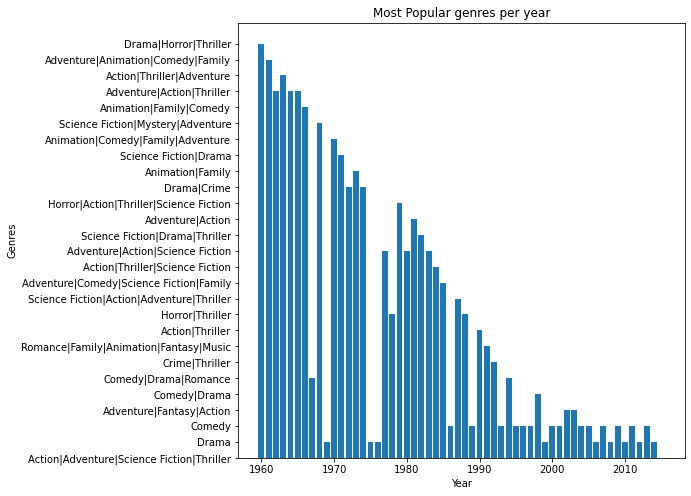

In [67]:
plt.figure(figsize=(8,8))
plt.bar(df_gen['release_year'],df_gen['genres'])
plt.xlabel('Year')
plt.ylabel('Genres')
plt.title('Most Popular genres per year');

In [68]:
df_gen['genres'].value_counts()

Comedy                                       14
Drama                                         9
Adventure|Action|Science Fiction              3
Adventure|Action|Thriller                     3
Adventure|Fantasy|Action                      2
Comedy|Drama|Romance                          2
Horror|Thriller                               2
Drama|Crime                                   2
Horror|Action|Thriller|Science Fiction        1
Adventure|Animation|Comedy|Family             1
Action|Thriller|Adventure                     1
Animation|Family|Comedy                       1
Science Fiction|Mystery|Adventure             1
Animation|Comedy|Family|Adventure             1
Science Fiction|Drama                         1
Animation|Family                              1
Action|Adventure|Science Fiction|Thriller     1
Adventure|Action                              1
Science Fiction|Drama|Thriller                1
Action|Thriller|Science Fiction               1
Adventure|Comedy|Science Fiction|Family 

it appears that Comedy genre is populare to many years and then Drama

### Question 2 - What are the difference between long Movie and Short Movie?

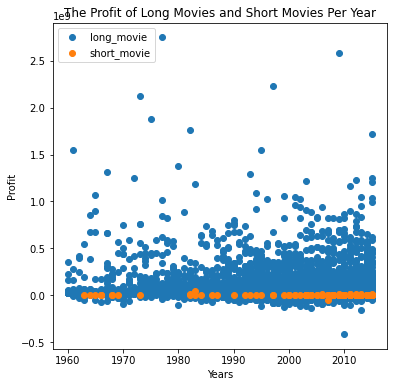

In [69]:
plt.figure(figsize=(6,6))
plt.scatter(df_long['release_year'],df_long['profit'],label='long_movie')
plt.scatter(df_short['release_year'],df_short['profit'],label='short_movie')
plt.xlabel('Years')
plt.ylabel('Profit')
plt.title('The Profit of Long Movies and Short Movies Per Year')
plt.legend();


The long Movies have increasing profit from 1960 to 2015<br>
but in short Movies it appears that the profit hasn't change from 1960 to 2015

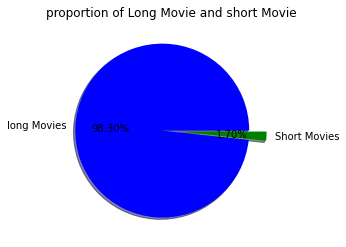

In [70]:
labels=['long Movies','Short Movies']
colors=['blue','green']
plt.pie([proportion_long,proportion_short],colors=colors,labels=labels,explode=(0.1,0.1),autopct='%1.2f%%',shadow=True);
plt.title('proportion of Long Movie and short Movie');

the Long movies dominate the most movies in dataset by 98.3%

### Question 3 - What kinds of properties are associated with movies that have high revenues?

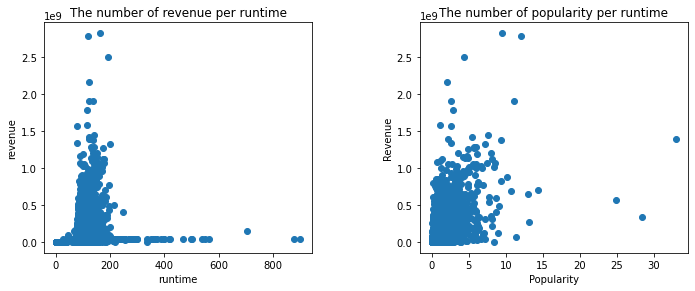

In [71]:
plt.subplot(1, 2, 1)
plt.scatter(df['runtime'],df['revenue'])
plt.xlabel('runtime')
plt.ylabel('revenue')
plt.title('The number of revenue per runtime');

plt.subplot(1, 2, 2)
plt.scatter(df['popularity'],df['revenue'])
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('The number of popularity per runtime')


plt.subplots_adjust(left=0.01,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

<ul>
    <li>
To have high revenue the movie should less than 200 minutes<br>
<li>
most of highest movies have number of popularity less than 15  
    <ul>

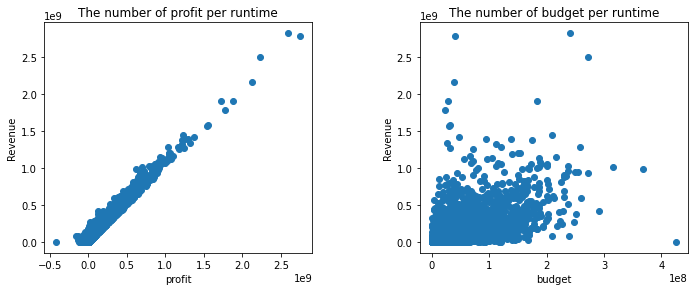

In [72]:
plt.subplot(1, 2, 1)
plt.scatter(df['profit'],df['revenue'])
plt.xlabel('profit')
plt.ylabel('Revenue')
plt.title('The number of profit per runtime')

plt.subplot(1, 2, 2)
plt.scatter(df['budget'],df['revenue'])
plt.xlabel('budget')
plt.ylabel('Revenue')
plt.title('The number of budget per runtime')

plt.subplots_adjust(left=0.01,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


<ul>
    <li> There is correlation between profits and revenues
    <li>
Most of highest revenues have budget less than 300,000,000 millions 

### Question 4 - how many movies per  genres?

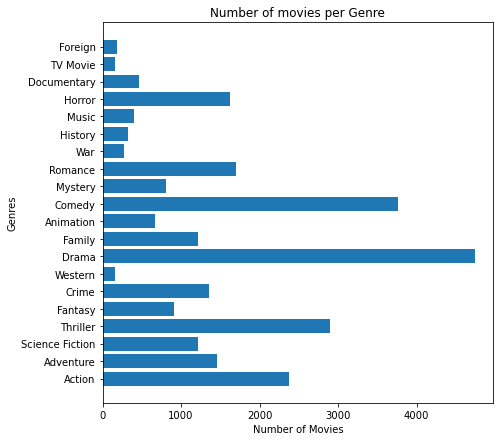

In [73]:
plt.figure(figsize=(7,7))
plt.barh(gen,val);
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.title('Number of movies per Genre');

Drama and Comedy have the most of movies

## limitation

<ul>
<li>zeros values in budgets and revenues affected our result by creating a lot of outliers in the dataset

In [74]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295